In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [26]:
observations = pd.read_csv('observations.csv')
species = pd.read_csv('species_info.csv')

# Merge the two dataframes.

bio = pd.merge(observations, species, how='inner', on='scientific_name')

In [27]:
print(bio.head(10))
print('\n')
print(bio.info())

      scientific_name                            park_name  observations  \
0  Vicia benghalensis  Great Smoky Mountains National Park            68   
1  Vicia benghalensis               Yosemite National Park           148   
2  Vicia benghalensis            Yellowstone National Park           247   
3  Vicia benghalensis                  Bryce National Park           104   
4      Neovison vison  Great Smoky Mountains National Park            77   
5      Neovison vison            Yellowstone National Park           218   
6      Neovison vison                  Bryce National Park            91   
7      Neovison vison               Yosemite National Park           200   
8   Prunus subcordata               Yosemite National Park           138   
9   Prunus subcordata            Yellowstone National Park           217   

         category                        common_names conservation_status  
0  Vascular Plant  Purple Vetch, Reddish Tufted Vetch                 NaN  
1  Vascular

In [28]:
# Fix NaN to Status Unknown in conservation_status.

bio['conservation_status'] = bio['conservation_status'].fillna('Status Unknown')
print(bio['conservation_status'].value_counts())

Status Unknown        24752
Species of Concern      732
Endangered               80
Threatened               44
In Recovery              24
Name: conservation_status, dtype: int64


In [29]:
# Find and delete any duplicates.

duplicate = bio[bio.duplicated()]
print("Duplicate Rows: " + str(duplicate))

print('\n')

bio.drop_duplicates(keep=False, inplace=True)
duplicate = bio[bio.duplicated()]
print("Duplicate Rows: " + str(duplicate))

Duplicate Rows:               scientific_name                            park_name  \
1070     Monotropa hypopithys  Great Smoky Mountains National Park   
1071     Monotropa hypopithys  Great Smoky Mountains National Park   
1850           Plantago major  Great Smoky Mountains National Park   
1851           Plantago major  Great Smoky Mountains National Park   
2126     Eleocharis palustris  Great Smoky Mountains National Park   
2127     Eleocharis palustris  Great Smoky Mountains National Park   
2270   Echinochloa crus-galli  Great Smoky Mountains National Park   
2271   Echinochloa crus-galli  Great Smoky Mountains National Park   
2572            Arctium minus               Yosemite National Park   
2573            Arctium minus               Yosemite National Park   
3164       Spilogale putorius            Yellowstone National Park   
3165       Spilogale putorius            Yellowstone National Park   
4990      Hesperis matronalis                  Bryce National Park   
4991

In [30]:
# Update column headers.

bio = bio.rename(columns={'scientific_name': 'Scientific Name', 'park_name': 'National Park', 'observations': 'Observations', 'category': 'Animal Type', 'common_names': 'Name', 'conservation_status': 'Conservation Status'})
print(bio.head())

      Scientific Name                        National Park  Observations  \
0  Vicia benghalensis  Great Smoky Mountains National Park            68   
1  Vicia benghalensis               Yosemite National Park           148   
2  Vicia benghalensis            Yellowstone National Park           247   
3  Vicia benghalensis                  Bryce National Park           104   
4      Neovison vison  Great Smoky Mountains National Park            77   

      Animal Type                                Name Conservation Status  
0  Vascular Plant  Purple Vetch, Reddish Tufted Vetch      Status Unknown  
1  Vascular Plant  Purple Vetch, Reddish Tufted Vetch      Status Unknown  
2  Vascular Plant  Purple Vetch, Reddish Tufted Vetch      Status Unknown  
3  Vascular Plant  Purple Vetch, Reddish Tufted Vetch      Status Unknown  
4          Mammal                       American Mink      Status Unknown  


In [31]:
# Get rid of "National Park" at the end of each observation.

bio['National Park'] = bio['National Park'].map(lambda x: x.lstrip('National Park').rstrip('National Park'))
print(bio.head())

      Scientific Name          National Park  Observations     Animal Type  \
0  Vicia benghalensis  Great Smoky Mountains            68  Vascular Plant   
1  Vicia benghalensis               Yosemite           148  Vascular Plant   
2  Vicia benghalensis            Yellowstone           247  Vascular Plant   
3  Vicia benghalensis                  Bryce           104  Vascular Plant   
4      Neovison vison  Great Smoky Mountains            77          Mammal   

                                 Name Conservation Status  
0  Purple Vetch, Reddish Tufted Vetch      Status Unknown  
1  Purple Vetch, Reddish Tufted Vetch      Status Unknown  
2  Purple Vetch, Reddish Tufted Vetch      Status Unknown  
3  Purple Vetch, Reddish Tufted Vetch      Status Unknown  
4                       American Mink      Status Unknown  


In [32]:
bio

,Scientific Name,National Park,Observations,Animal Type,Name,Conservation Status
0,Vicia benghalensis,Great Smoky Mountains,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",Status Unknown
1,Vicia benghalensis,Yosemite,148,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",Status Unknown
2,Vicia benghalensis,Yellowstone,247,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",Status Unknown
3,Vicia benghalensis,Bryce,104,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",Status Unknown
4,Neovison vison,Great Smoky Mountains,77,Mammal,American Mink,Status Unknown
...,...,...,...,...,...,...
25627,Gulo gulo,Yosemite,157,Mammal,Wolverine,Status Unknown
25628,Dichanthelium depauperatum,Great Smoky Mountains,88,Vascular Plant,"Green Panic-Grass, Panic Grass",Status Unknown
25629,Dichanthelium depauperatum,Bryce,80,Vascular Plant,"Green Panic-Grass, Panic Grass",Status Unknown
25630,Dichanthelium depauperatum,Yellowstone,255,Vascular Plant,"Green Panic-Grass, Panic Grass",Status Unknown


In [33]:
# Clean up data to plot a histogram by parks.

bio2=bio.set_index(['National Park', 'Scientific Name'])
bio2=bio2.pivot_table(index='Scientific Name',columns='National Park', values='Observations')
bio2

National Park,Bryce,Great Smoky Mountains,Yellowstone,Yosemite
Scientific Name,,,,
Abies bifolia,109.0,72.0,215.0,136.0
Abies concolor,83.0,101.0,241.0,205.0
Abies fraseri,109.0,81.0,218.0,110.0
Abietinella abietina,101.0,65.0,243.0,183.0
Abronia ammophila,92.0,72.0,222.0,137.0
...,...,...,...,...
Zonotrichia leucophrys gambelii,58.0,87.0,246.0,169.0
Zonotrichia leucophrys oriantha,73.0,123.0,227.0,135.0
Zonotrichia querula,105.0,83.0,268.0,160.0


<Figure size 864x648 with 0 Axes>

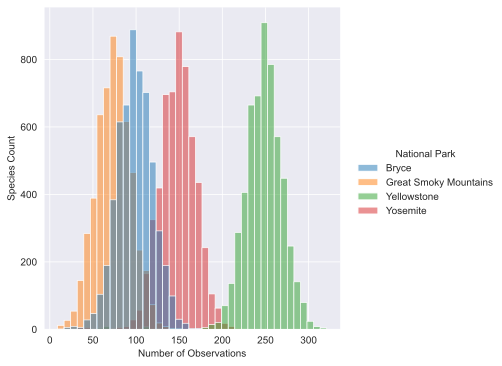

In [34]:
# Find which park has the highest number of observations.

%config InlineBackend.figure_formats = ['svg']
%matplotlib inline
fig=plt.figure(figsize=(12,9));
sns.set_style('darkgrid');
sns.displot(data=bio2);
plt.xlabel('Number of Observations')
plt.ylabel('Species Count')
None

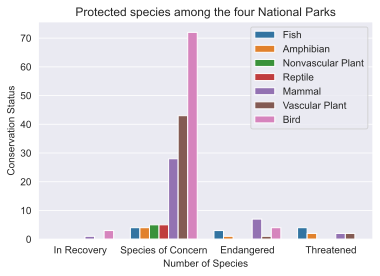

In [35]:
# Remove species without status and make a dataframe with counts on scientific name
conservation_dist = species[species.conservation_status != 'No Status']
conservation_dist = conservation_dist.groupby(['category', 'conservation_status']).scientific_name.count().reset_index()


# Find which animal type has the most endangered species.
sns.barplot(data=conservation_dist, x='conservation_status', y='scientific_name', order=['In Recovery', 'Species of Concern', 'Endangered', 'Threatened'], hue='category', hue_order=['Fish', 'Amphibian', 'Nonvascular Plant', 'Reptile', 'Mammal', 'Vascular Plant', 'Bird'])
plt.legend(loc=1)
plt.xlabel('Number of Species')
plt.ylabel('Conservation Status')
plt.title('Protected species among the four National Parks')
plt.show()